In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt
import pickle
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.regressionplots import plot_partregress_grid
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_roc_curve, plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [4]:
df = pd.read_csv('Output_Data\Model_1_baseline_data.csv')
df.head()

,label,age,gender,residence,city,city_rank,series_dev,series_group,emui_dev,device_name,...,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,spread_app_id,hispace_app_tags,app_second_class,app_score,u_refreshTimes,u_feedLifeCycle
0,0,3,2,16,147,2,32,6,35,312,...,6,1846,4,46,162,47,14,10.0,0,15
1,1,3,2,16,147,2,32,6,35,312,...,8,1060,4,37,344,20,13,10.0,0,15
2,1,3,2,16,147,2,32,6,35,312,...,8,1060,4,37,344,20,13,10.0,0,15
3,0,3,2,16,147,2,32,6,35,312,...,8,1542,4,47,152,49,17,10.0,0,15
4,0,3,2,16,147,2,32,6,35,312,...,8,1036,4,44,312,43,18,10.0,0,15


In [ ]:
df.columns

# BASELINE MODEL

decision tree

simple columns

In [5]:
X = df.drop(columns='label')
y = df.label

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2333)

X_train.shape, X_test.shape

((5372861, 23), (2302656, 23))

In [7]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

0    7556381
1     119136
Name: label, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    5289478
0    5289478
Name: label, dtype: int64


In [11]:
tree_clf = DecisionTreeClassifier(criterion = 'gini', random_state=2333)

tree_clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=2333)

In [12]:
tree_clf.get_depth()

58

In [13]:
df.label.value_counts(normalize=True)

0    0.984478
1    0.015522
Name: label, dtype: float64

### score

In [14]:
y_hat_test = tree_clf.predict(X_test)

print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98   2266903
           1       0.16      0.22      0.19     35753

    accuracy                           0.97   2302656
   macro avg       0.58      0.60      0.59   2302656
weighted avg       0.97      0.97      0.97   2302656



In [15]:
confusion_matrix(y_test, y_hat_test)

array([[2226029,   40874],
       [  27747,    8006]], dtype=int64)

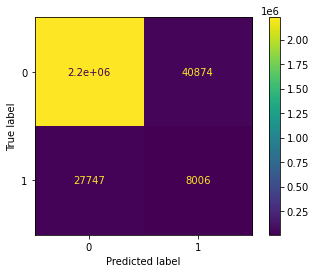

In [16]:
plot_confusion_matrix(tree_clf,X_test, y_test)

In [ ]:
filename = 'tree_model.pkl'
pickle.dump(tree_clf, open(filename, 'wb'))

# balanaced random forest classifier

In [8]:
from imblearn.ensemble import BalancedRandomForestClassifier

BRFC_clf = BalancedRandomForestClassifier(random_state=2333)
BRFC_clf.fit(X_train_resampled, y_train_resampled) 

BalancedRandomForestClassifier(random_state=2333)

In [9]:
# save the model to disk
filename = 'BRFC_baseline_model.pkl'
pickle.dump(BRFC_clf, open(filename, 'wb'))

In [10]:
y_hat_test = BRFC_clf.predict(X_test)

print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99   2266903
           1       0.31      0.20      0.24     35753

    accuracy                           0.98   2302656
   macro avg       0.65      0.60      0.62   2302656
weighted avg       0.98      0.98      0.98   2302656

